<a href="https://colab.research.google.com/github/DhanieArdiyan/ASE2306-Capstone-Project/blob/main/Capstone_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install stopwords

In [2]:
# pip install nltk

In [3]:
#START INITIALISATION
from textblob import TextBlob
from wordcloud import WordCloud
import re
import pandas as pd 
import numpy as np 
import sys, tweepy
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

def percentage(part, whole):
	return 100 * float(part)/float(whole)

consumer_key = "duCD34AKM0yj2FJGe1vOomirc"
consumer_secret = "aKkRF84oLs3pGm5gJzPavojoI23WZXMxrv4FWGZMKWnnSCoF1r"
access_token = "1284696550740901893-xwi5gsHUdnwnD1ztZbSyVdhe6ZWdev"
access_token_secret = "y8yNJJIxXtKiUgeY6kh8xWNSGEssNdCAdTIwQqnqR57yk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth, wait_on_rate_limit=True) 

In [4]:
#EXTRACTING TWEETS
keyWord = input("Enter the keyword you are searching for (skip if NA):  ") #search by keyword
UserName = input("Enter the Twitter username (excluding @, skip if NA): ") #search by username
inputString = keyWord +" from:" + UserName

public_tweets = api.search(q=inputString, count=1000, lang = "en")

i = 1
for tweet in public_tweets:
  print ('\n')
  print ((str(i) + ') ' + tweet.text))
  print (('Tweeted by') + ': ' + str(tweet.user.screen_name))
  print (('Tweeted at') + ': ' + str(tweet.user.location))
  print (('Tweeted on') + ': ' + str(tweet.created_at))
  i=i+1
  # print(tweet.text)

#IF I want to print the latest 5 tweets from the account
# print("Show the 5 recent tweets: \n")
# i = 1
# for tweet in posts [0:5]:
#     print ((str(i) + ') ' + tweet.full_text + '\n'))
#     i = i + 1

#Creating a dataframe with a column called Tweets
df = pd.DataFrame ([tweet.text for tweet in public_tweets], columns = ['Tweets'])

#Show first 5 rows of data
df.head()

#function to clean the tweets
def cleanTxt(text):
	text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
	text = re.sub(r'#', '', text) #removes the '#'
	text = re.sub(r'RT[\s+]+', '', text) #removing RT
	text = re.sub(r'https?:\/\/\S+', '', text) #removes hyperlinks
	return text

#cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

#Subjectivity function
def getSubjectivity(text):
	return TextBlob(text).sentiment.subjectivity

#Polarity function
def getPolarity(text):
	return TextBlob(text).sentiment.polarity

#Creating columns for Subjectivity and Polarity
df ['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df ['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df


Enter the keyword you are searching for (skip if NA):  
Enter the Twitter username (excluding @, skip if NA): channelnewsasia


1) Singapore reports 7 new #COVID19 cases, all imported: MOH
https://t.co/0j3Je0uuIB https://t.co/SiiN5DHHVN
Tweeted by: ChannelNewsAsia
Tweeted at: Singapore
Tweeted on: 2020-11-07 07:39:47


2) Important to talk about mental health, says Chelsea's Chilwell https://t.co/GLsxm0AjUd https://t.co/6zCiXNqNrN
Tweeted by: ChannelNewsAsia
Tweeted at: Singapore
Tweeted on: 2020-11-07 06:57:32


3) Trump chief of staff Meadows diagnosed with COVID-19 https://t.co/TbaYo23UgL https://t.co/K2EIinjXA0
Tweeted by: ChannelNewsAsia
Tweeted at: Singapore
Tweeted on: 2020-11-07 05:31:32


4) Newcastle boss Bruce sweats over fitness of striker Wilson https://t.co/kVLfzOX74u https://t.co/GARKULtgUM
Tweeted by: ChannelNewsAsia
Tweeted at: Singapore
Tweeted on: 2020-11-07 05:19:03


5) COVID-19: Australia to allow additional 450 citizens to return before end of 2020 https://t.co/7

,Tweets,Subjectivity,Polarity
0,"Singapore reports 7 new COVID19 cases, all imp...",0.454545,0.136364
1,"Important to talk about mental health, says Ch...",0.600000,0.150000
2,Trump chief of staff Meadows diagnosed with CO...,0.000000,0.000000
3,Newcastle boss Bruce sweats over fitness of st...,0.000000,0.000000
4,COVID-19: Australia to allow additional 450 ci...,0.000000,0.000000
...,...,...,...
95,'Worst storm in decades': Central America reel...,0.625000,-0.500000
96,All aboard: 'Cruise to nowhere' sets sail from...,0.000000,0.000000
97,"Football: I don't crumble under pressure, says...",0.000000,0.000000
98,Football: Mourinho uneasy with Arsenal coach m...,0.000000,0.000000


In [5]:
# # #Plotting WORDCLOUD
# allWords = ' '.join([twts for twts in df['Tweets']])
# wordcloud = WordCloud(width = 5000, height = 300, random_state = 21, max_font_size = 100).generate(allWords)

# plt.imshow(WordCloud, interpolation = "bilinear")
# plt.axis('off')
# plt.show()



In [6]:
#Computing the negative, neutral, positive analysis
def getAnalysis (score):
	if score < 0:
		return 'Negative'
	elif score == 0:
		return 'Neutral'
	else:
		return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df


,Tweets,Subjectivity,Polarity,Analysis
0,"Singapore reports 7 new COVID19 cases, all imp...",0.454545,0.136364,Positive
1,"Important to talk about mental health, says Ch...",0.600000,0.150000,Positive
2,Trump chief of staff Meadows diagnosed with CO...,0.000000,0.000000,Neutral
3,Newcastle boss Bruce sweats over fitness of st...,0.000000,0.000000,Neutral
4,COVID-19: Australia to allow additional 450 ci...,0.000000,0.000000,Neutral
...,...,...,...,...
95,'Worst storm in decades': Central America reel...,0.625000,-0.500000,Negative
96,All aboard: 'Cruise to nowhere' sets sail from...,0.000000,0.000000,Neutral
97,"Football: I don't crumble under pressure, says...",0.000000,0.000000,Neutral
98,Football: Mourinho uneasy with Arsenal coach m...,0.000000,0.000000,Neutral


In [7]:
#To seperate and print POSITIVE tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
	if (sortedDF['Analysis'][i] == 'Positive'):
		print (str(j) + ') '+sortedDF['Tweets'][i])
		print()
		j = j + 1


1) Singapore reports 7 new COVID19 cases, all imported: MOH
 

2) Important to talk about mental health, says Chelsea's Chilwell  

3) Netherlands' Miedema backs Wiegman for England success  

4) Joe Biden projects confidence he will win White House with 'clear majority'  

5) China exports remain strong in October, import growth slows  

6) VIDEO: The latest job market figures showed Singapore's unemployment rate climbing to a 16-year high. When will thi… 

7) China reports 33 new coronavirus cases  

8) Soccer-Sassuolo held by Udinese, miss chance to top Serie A  

9) Southwest Airlines issues notices of furloughs for first time in 49-year existence  

10) Johnny Depp is out of Fantastic Beasts after losing 'wife beater' case  

11) Football: Southampton go top with 2-0 win over Newcastle  

12) Rossi OK to race but Yamaha boss goes into quarantine  

13) Analysis: High-flying US tech stocks get post-election lift, near new highs  

14) Southampton go top with 2-0 win over Newcastle 

In [8]:
#To seperate and print NEGATIVE tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print (str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j + 1

1) "Let's put the anger and demonisation behind us. It's time for us to come together as a nation to heal": Joe Biden… 

2) Former Singapore international footballer Salim Moin dies aged 59  

3) Why is US vote count taking so long?  

4) Commentary: What's behind claims of electoral fraud in US elections  

5) Commentary: The never-ending political game of Mahathir Mohamad  

6) Stressed out, anxious and unable to focus? Here are 10 ways to calm down  

7) Republicans seeking to raise at least US$60 million to fund Trump legal challenges  

8) Brazil off to bad start on Paris climate deal: Watchdog  

9) Europe COVID-19 deaths surge past 300,000  

10) Trump faces tough road in getting Supreme Court to intervene  

11) Wall Street Week Ahead: Small caps join market rally but pandemic could derail them  

12) Small group of Southwest workers receive warnings of first-ever furloughs  

13) Video games, long runs and Riesling: How Wall Streeters calmed election nerves  

14) CVS Health C

In [9]:
#To seperate and print NEUTRAL tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
	if (sortedDF['Analysis'][i] == 'Neutral'):
		print (str(j) + ') '+sortedDF['Tweets'][i])
		print()
		j = j + 1


1) Trump chief of staff Meadows diagnosed with COVID-19  

2) Newcastle boss Bruce sweats over fitness of striker Wilson  

3) COVID-19: Australia to allow additional 450 citizens to return before end of 2020  

4) Supreme Court denies immediate halt of Pennsylvania count  

5) US COVID-19 cases hit record for third day, topping 127,000  

6) Baffert's Improbable battles stacked field at Breeders' Cup  

7) USElections2020: As Joe Biden edges closer to securing enough votes, Donald Trump has vowed to continue his legal… 

8) Trump says Biden 'should not wrongfully claim' presidency  

9) What we're doing is scary, says Hasenhuttl as Saints go top  

10) This staycation package gives you backstage access to historic Singapore buildings  

11) EU set to impose tariffs on US$4 billion US goods next week  

12) Google says it will not file motion to dismiss US lawsuit  

13) Second lockdown observations: COVID-19 donor fatigue kicks in, but Malaysia's volunteers persevere… 

14) Colombia's

In [10]:
#POSITIVE TWEETS in %
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

positive = round ( (ptweets.shape[0]/df.shape[0]) * 100, 1)
positive

38.0

In [11]:
#NEGATIVE TWEETS in %
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

negative = round ( (ntweets.shape[0]/df.shape[0]) * 100, 1)
negative

17.0

In [12]:
#NEUTRAL TWEETS in %
100 - positive - negative

45.0

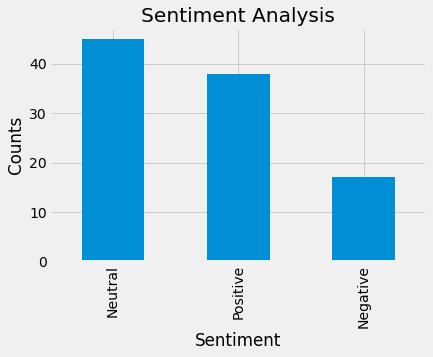

In [13]:
#BAR GRAPH - POSITIVE, NEGATIVE, NEUTRAL
df['Analysis'].value_counts()

#plot and visualise the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

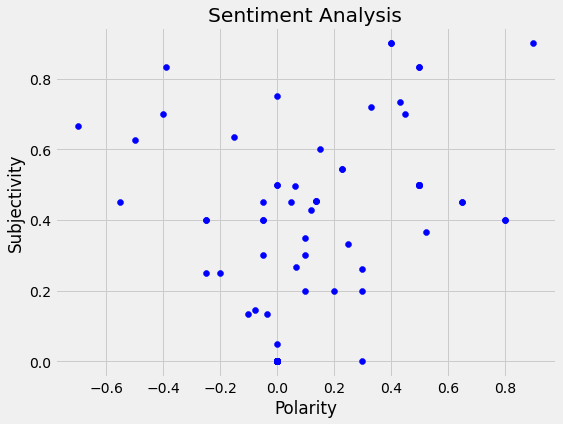

In [14]:
#SCATTER PLOT - POLARITY AND SUBJECTIVITY
plt.figure(figsize = (8,6))
for i in range (0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue') #(x,y axis)

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [15]:
#ATTEMPT 1 TO MEASURE ACCURACY
#METHOD: USING LSTM & RNN
#link: https://analyticsindiamag.com/how-to-implement-lstm-rnn-network-for-sentiment-analysis/

In [16]:
# from google.colab import files

# df.to_csv('insertcsvfilehere.csv')
# files.download('insertcsvfilehere.csv')

In [17]:
# import numpy as np
# import pandas as pd
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils.np_utils import to_categorical
# import re

# from google.colab import files

# df.to_csv('f1.csv')
# files.download('f1.csv')

# print(df.columns)

In [18]:
# new_df = df[['text','sentiment']]

# print(data.sentiment)

In [19]:
# new_df = new_df[new_df.sentiment != "Neutral"]
# new_df['text'] = new_df['text'].str.lower()
# new_df['text'] = new_df['text'].re.sub('[^a-zA-z0-9\s]')

# tokenizer = Tokenizer(num_words=1500, split=' ')
# tokenizer.fit_on_texts(data['text'].values)
# X = tokenizer.texts_to_sequences(new_df['text'])
# X = pad_sequences(X)

# embed_dim = 128
# lstm_out = 196
# model = Sequential()
# model.add(Embedding(vocabSize, embed_dim,input_length = 28)) 

# model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(2,activation='softmax'))
# model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [20]:
# from sklearn.preprocessing import LabelEncoder
# Le = LabelEncoder()
# y = Le.fit_transform(new_df['sentiment'])

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 42)
# model.fit(X_train, Y_train,validation_data = (X_test,y_test),epochs = 10, batch_size=32)

# model.evaluate(X_test,y_test)

In [21]:
# print("Prediction: ",model.predict_classes(X_test[5:10]))
# print("Actual: \n",y_test[5:10])

In [22]:
#ATTEMPT 2 TO MEASURE ACCURACY
#METHOD: Training model by RandomForestClassifier algorithm
#link: https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/

In [23]:
# import matplotlib.pyplot as plt 
# import nltk
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# processed_features = []
# features = df['Tweets']


# for sentence in range(0, len(features)):
#     # Remove all the special characters
#     processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

     # remove all single characters
#     processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

#     # Remove single characters from the start
#     processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

#     # Substituting multiple spaces with single space
#     processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

#     # Removing prefixed 'b'
#     processed_feature = re.sub(r'^b\s+', '', processed_feature)

#     # Converting to Lowercase
#     processed_feature = processed_feature.lower()

#     processed_features.append(processed_feature)

# processed_features

In [24]:
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
# processed_features = vectorizer.fit_transform(processed_features).toarray()

# #max_features = most frequently occuring words to create a bag of words feature vector
# #max_df = specifies to only using words that occur in a maximum of 80% of the docs
# #min_df = similar, include words that occur in at least 7 docs

In [25]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(processed_features, df, test_size=0.2, random_state=0)

In [26]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler

# text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
# text_classifier.fit(X_train, y_train)

In [27]:
# predictions = text_classifier.predict(X_test)

In [28]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,predictions))
# print(classification_report(y_test,predictions))
# print(accuracy_score(y_test, predictions))

In [29]:
#ATTEMPT 3 TO MEASURE ACCURACY
#METHOD: Implementing SVM with Scikit-Learn
#link: https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [30]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# bankdata = pd.read_csv("bill_authentication.csv")
# bankdata.shape
# bankdata.head()

# X = bankdata.drop('Class', axis=1)
# y = bankdata['Class']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# from sklearn.svm import SVC
# svclassifier = SVC(kernel='linear')
# svclassifier.fit(X_train, y_train)

# y_pred = svclassifier.predict(X_test)

# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))